# OASIS AS_REQ DAM _and_ FUEL_PRC

OASIS AS_REQ Day Ahead Market Report(s)
and
OASIS FUEL_PRC Report(s)

## Load the data

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
from pandasql import sqldf
# Create the connections
cnx1 = sqlite3.connect(r'../data/data-oasis-as-req-dam/db/caiso-oasis-as-req-dam.db')
cnx2 = sqlite3.connect(r'../data/data-oasis-prc-fuel-all/db/caiso-oasis-prc-fuel-all.db')

## Preview the schema

In [17]:
for row in cnx1.execute("PRAGMA table_info([oasis]);"):
    print(row)

(0, 'timedate', 'STRING', 0, None, 0)
(1, 'timedate_posix', 'INTEGER', 0, None, 0)
(2, 'source', 'STRING', 0, None, 1)
(3, 'version', 'STRING', 0, None, 0)
(4, 'name', 'STRING', 0, None, 2)
(5, 'system', 'STRING', 0, None, 3)
(6, 'tz', 'STRING', 0, None, 4)
(7, 'report', 'STRING', 0, None, 5)
(8, 'mkt_type', 'STRING', 0, None, 6)
(9, 'uom', 'STRING', 0, None, 7)
(10, 'interval', 'STRING', 0, None, 0)
(11, 'sec_per_interval', 'INTEGER', 0, None, 0)
(12, 'data_item', 'STRING', 0, None, 8)
(13, 'resource_name', 'STRING', 0, None, 9)
(14, 'opr_date', 'STRING', 0, None, 0)
(15, 'opr_date_8601', 'STRING', 0, None, 0)
(16, 'interval_num', 'INTEGER', 0, None, 10)
(17, 'interval_start_gmt', 'STRING', 0, None, 0)
(18, 'interval_start_posix', 'INTEGER', 0, None, 11)
(19, 'interval_end_gmt', 'STRING', 0, None, 0)
(20, 'interval_end_posix', 'INTEGER', 0, None, 12)
(21, 'value', 'NUMBER', 0, None, 0)


In [18]:
for row in cnx2.execute("PRAGMA table_info([oasis]);"):
    print(row)

(0, 'timedate', 'STRING', 0, None, 0)
(1, 'timedate_posix', 'INTEGER', 0, None, 0)
(2, 'source', 'STRING', 0, None, 1)
(3, 'version', 'STRING', 0, None, 0)
(4, 'name', 'STRING', 0, None, 2)
(5, 'system', 'STRING', 0, None, 3)
(6, 'tz', 'STRING', 0, None, 4)
(7, 'report', 'STRING', 0, None, 5)
(8, 'mkt_type', 'STRING', 0, None, 6)
(9, 'uom', 'STRING', 0, None, 7)
(10, 'interval', 'STRING', 0, None, 0)
(11, 'sec_per_interval', 'INTEGER', 0, None, 0)
(12, 'data_item', 'STRING', 0, None, 8)
(13, 'resource_name', 'STRING', 0, None, 9)
(14, 'opr_date', 'STRING', 0, None, 0)
(15, 'opr_date_8601', 'STRING', 0, None, 0)
(16, 'interval_num', 'INTEGER', 0, None, 10)
(17, 'interval_start_gmt', 'STRING', 0, None, 0)
(18, 'interval_start_posix', 'INTEGER', 0, None, 11)
(19, 'interval_end_gmt', 'STRING', 0, None, 0)
(20, 'interval_end_posix', 'INTEGER', 0, None, 12)
(21, 'value', 'NUMBER', 0, None, 0)


## Preview the available reports

In [19]:
for row in cnx1.execute("select distinct report from oasis"):
    print(row)

('AS_REQ',)


In [20]:
for row in cnx2.execute("select distinct report from oasis"):
    print(row)

('PRC_FUEL',)


## Preview the data_item(s) 

In [21]:
for row in cnx1.execute("select distinct data_item from oasis where report == 'AS_REQ';"):
    print(row)

('NS_REQ_MAX_MW',)
('NS_REQ_MIN_MW',)
('RD_REQ_MAX_MW',)
('RD_REQ_MIN_MW',)
('RMD_REQ_MAX_MW',)
('RMD_REQ_MIN_MW',)
('RMU_REQ_MAX_MW',)
('RMU_REQ_MIN_MW',)
('RU_REQ_MAX_MW',)
('RU_REQ_MIN_MW',)
('SP_REQ_MAX_MW',)
('SP_REQ_MIN_MW',)


In [22]:
for row in cnx2.execute("select distinct data_item from oasis where report == 'PRC_FUEL';"):
    print(row)

('FUEL_PRC',)


## Sample the data

In [23]:
for row in cnx1.execute("select data_item, value, interval_start_posix from oasis where report == 'AS_REQ' limit 10;"):
    print(row)

('NS_REQ_MAX_MW', 0, 1357023600)
('NS_REQ_MIN_MW', 486.73, 1357023600)
('RD_REQ_MAX_MW', 0, 1357023600)
('RD_REQ_MIN_MW', 10, 1357023600)
('RU_REQ_MAX_MW', 0, 1357023600)
('RU_REQ_MIN_MW', 10, 1357023600)
('SP_REQ_MAX_MW', 0, 1357023600)
('SP_REQ_MIN_MW', 486.73, 1357023600)
('NS_REQ_MAX_MW', 0, 1357023600)
('NS_REQ_MIN_MW', 811.21, 1357023600)


In [24]:
for row in cnx2.execute("select data_item, value, interval_start_posix from oasis where report == 'PRC_FUEL' limit 10;"):
    print(row)


('FUEL_PRC', 3.99, 1357110000)
('FUEL_PRC', 3.99, 1357110000)
('FUEL_PRC', 4.2, 1357110000)
('FUEL_PRC', 3.89, 1357110000)
('FUEL_PRC', 4.2, 1357110000)
('FUEL_PRC', 3.89, 1357110000)
('FUEL_PRC', 3.99, 1357192800)
('FUEL_PRC', 3.99, 1357192800)
('FUEL_PRC', 4.2, 1357117200)
('FUEL_PRC', 3.89, 1357113600)


## Load a dataframes

In [25]:
df1 = pd.read_sql("select report, data_item, value, interval_start_posix from oasis where report = 'AS_REQ';", cnx1)
df1['ts'] = pd.to_datetime(df1['interval_start_posix'], unit='s')
df1 = df1.set_index('ts')
df1.drop(['interval_start_posix'], axis=1, inplace=True)
df1[0:5]

,report,data_item,value
ts,,,
2013-01-01 07:00:00,AS_REQ,NS_REQ_MAX_MW,0.00
2013-01-01 07:00:00,AS_REQ,NS_REQ_MIN_MW,486.73
2013-01-01 07:00:00,AS_REQ,RD_REQ_MAX_MW,0.00
2013-01-01 07:00:00,AS_REQ,RD_REQ_MIN_MW,10.00
2013-01-01 07:00:00,AS_REQ,RU_REQ_MAX_MW,0.00


In [26]:
df2 = pd.read_sql("select report, data_item, resource_name, value, interval_start_posix from oasis where report = 'PRC_FUEL';", cnx2)
df2['ts'] = pd.to_datetime(df2['interval_start_posix'], unit='s')
df2 = df2.set_index('ts')
df2.drop(['interval_start_posix'], axis=1, inplace=True)
df2[0:5]

,report,data_item,resource_name,value
ts,,,,
2013-01-02 07:00:00,PRC_FUEL,FUEL_PRC,CISO,3.99
2013-01-02 07:00:00,PRC_FUEL,FUEL_PRC,PGE2,3.99
2013-01-02 07:00:00,PRC_FUEL,FUEL_PRC,SCE1,4.20
2013-01-02 07:00:00,PRC_FUEL,FUEL_PRC,SCE2,3.89
2013-01-02 07:00:00,PRC_FUEL,FUEL_PRC,SDG1,4.20


## Avg Daily Fuel Prices

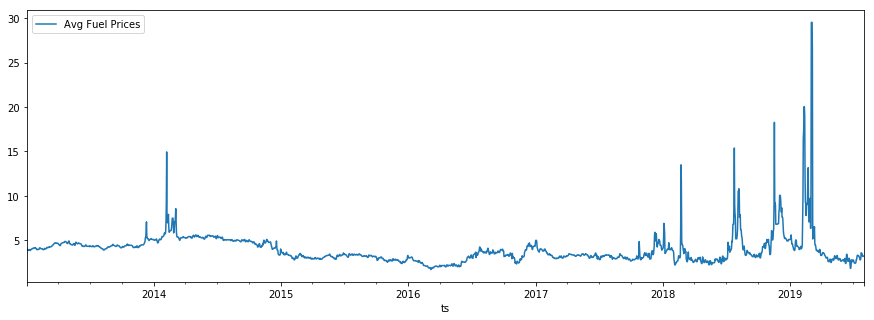

In [27]:
df2daily = df2.resample('D').mean()
df2daily.plot(y='value', label='Avg Fuel Prices')

## Avg Daily Fuel Prices by Name

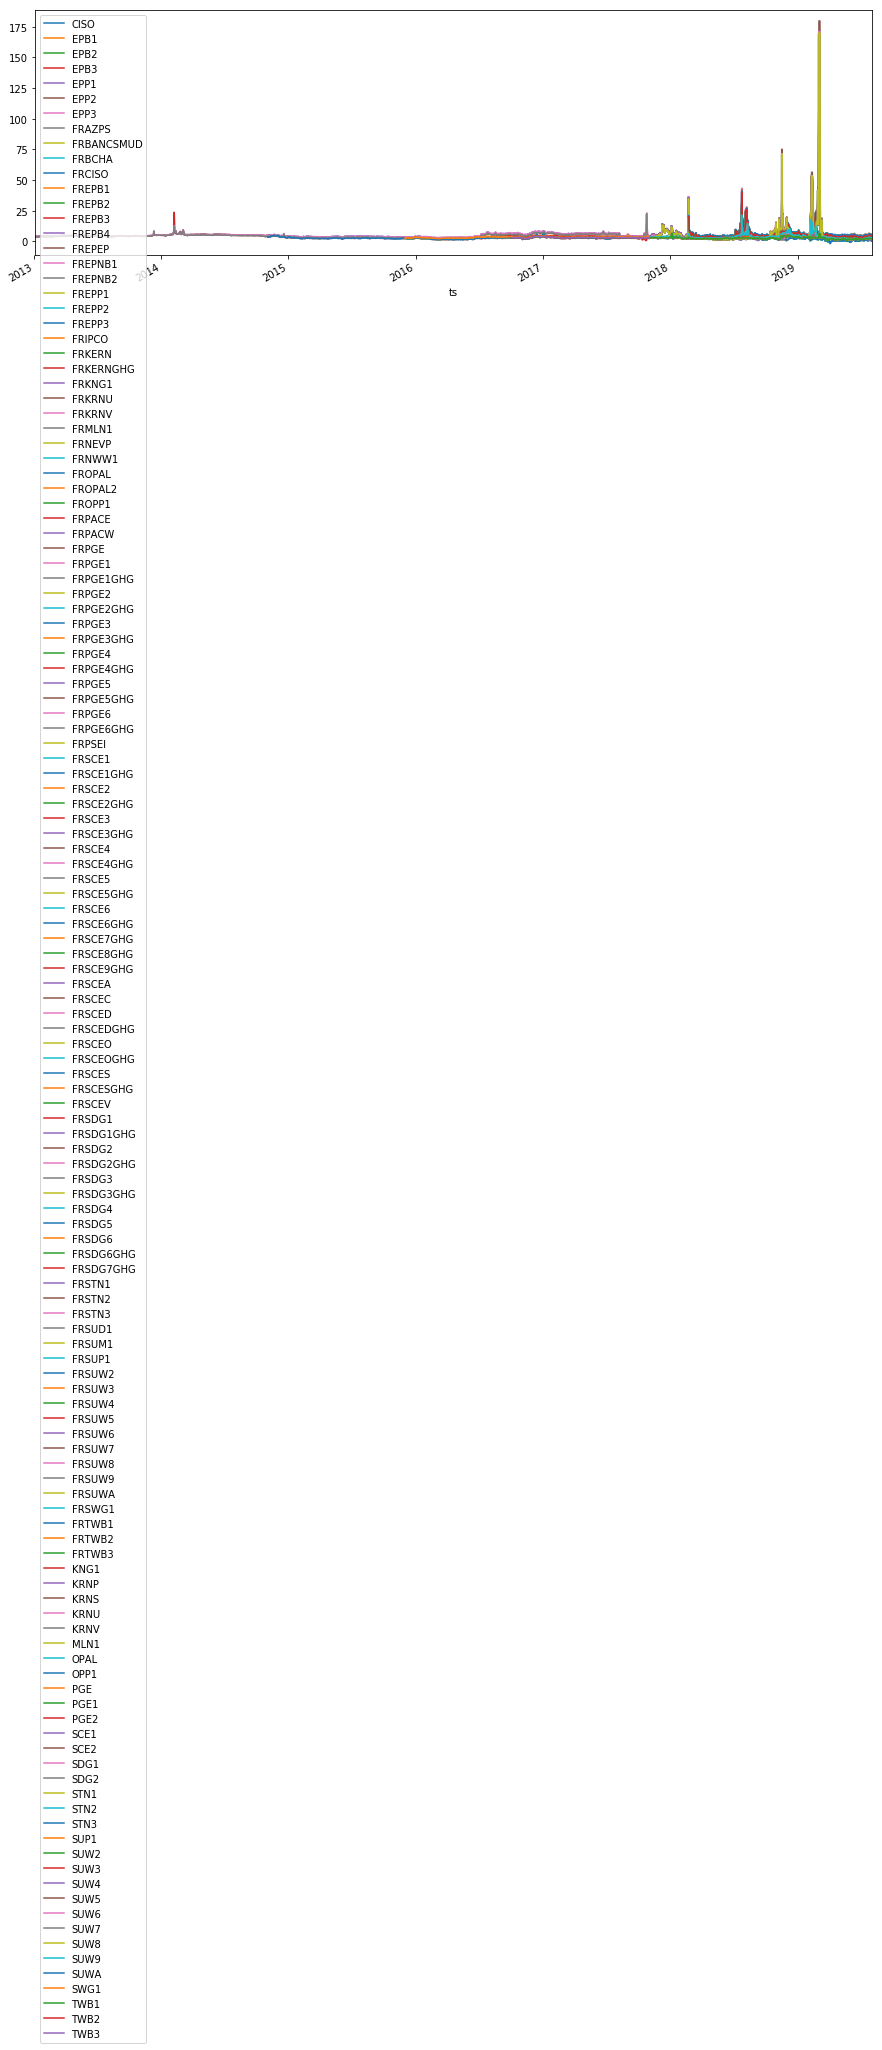

In [28]:
fig, ax = plt.subplots()
for name, grp in df2.groupby(['resource_name']):
    ax = grp.plot(ax=ax, y='value', label=name)

## Fuel Prices compared with AS_REQ DAM

/home/toddg/bin/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


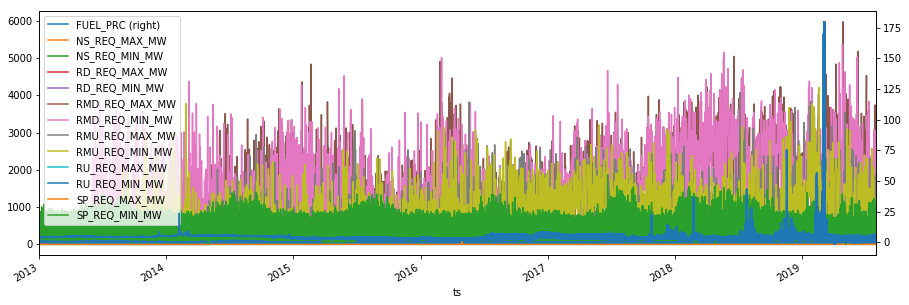

In [37]:
df3 = df1.append(df2)
fig, ax = plt.subplots()
for name, grp in df3.groupby(['data_item']):
    if name == "FUEL_PRC":
        ax = grp.plot(ax=ax, y='value', label=name, secondary_y=True)
    else:
        ax = grp.plot(ax=ax, y='value', label=name)

## Summary

_This notebook shows how to:_

* load mutiple datasets into dataframes
* append two different dataframes
* convert timestamps to dataframe time series
* display a single graph composed of data from multiple sources